Welcome to the Conformer Search notebook.
If you need a test molecule, use the SMILES for Nfkef below.

O=C(CNCC(=CC=C1)C=C1)N(CC(=O)N(CC(=O)N)CC(C=CC1)=CC=1)CCN

Final output can be downloaded from the files tab on the left. Recommended to get the whole folder for your molecule.

Input structure as SMILES from Chemdoodle: O=C(CNCC(=CC=C1)C=C1)N(CC(=O)N(CC(=O)N)CC(C=CC1)=CC=1)CCN
O=C(CNCC(=CC=C1)C=C1)N(CC(=O)N(CC(=O)N)CC(C=CC1)=CC=1)CCN
Name of this molecule: test3
test3
O=C(CNCC(=CC=C1)C=C1)N(CC(=O)N(CC(=O)N)CC(C=CC1)=CC=1)CCN
NCCN(CC(=O)N(CC(N)=O)Cc1ccccc1)C(=O)CNCc1ccccc1
test3
     RDKit          2D

 30 31  0  0  0  0  0  0  0  0999 V2000
    2.1706    3.0176    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5860    1.6362    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.4899    0.4392    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.9785    0.6235    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    4.8825   -0.5735    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.3711   -0.3892    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.2751   -1.5862    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    8.7637   -1.4019    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    9.3484   -0.0205    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0


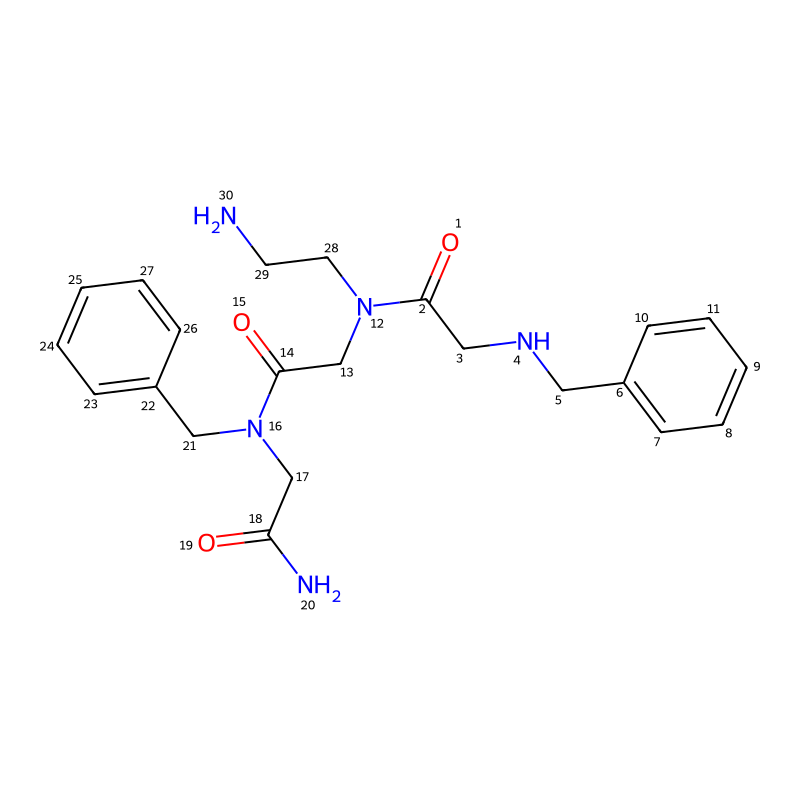


Feeding hamsters

Optimizing conformers with MMFF

Searching for min E conformer by MMFF 
0 : 68.60410879526479
1 : 57.63195190543011
2 : 56.154854661775886
18 : 53.76385150770953
29 : 53.0195648385924
32 : 52.070554939158725

Searching for conformers to keep 
0:68.60410879526479
1:57.63195190543011
2:56.154854661775886
3:66.24554633225654
4:65.79097771861319
5:69.4004430166318
6:75.98264190392057
7:70.19182553336104
8:65.15263025546228
9:66.71169688543091
10:58.6830033193617
12:60.06227446025756
13:63.85744790871459
14:71.93788137844919
17:56.31189227788045
18:53.76385150770953
20:59.40355156920783
21:73.75633759347761
22:54.15935434405827
23:71.28348561047147
24:67.59109508652496
25:66.836937665678
26:63.246525494505654
28:57.33834081234084
29:53.0195648385924
30:61.36001724381825
31:59.12892459107547
32:52.070554939158725
34:63.396378698109196
35:56.670216413674304
38:83.91519028584058
39:59.02878084870715
40:56.947384746627314
41:68.27689986990637
42:65.56407105423082
43:74.583363

In [45]:
#@title Click play to run Conformer Generation
## Conformer generating script for the Tresca Lab
## Version 2.0 by Blakely Tresca and Arman Khan, 2023
## Original code from RDKit Cookbook and mcsorkun https://github.com/mcsorkun/Conformer-Search

!pip install rdkit

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_3d = True
import math
import os

# Number of conformers to be generated
num_of_conformer = 200
max_iter = 500
rms_thresh = 0.5
# Default values for min energy conformer
min_energy_UFF = 10000
min_energy_index_UFF = 0
min_energy_MMFF = 10000
min_energy_index_MMFF = 0
# Default values for keeping structures
max_ener = 40  # kcal/mol
min_conf = 20
conf_keep = []
conf_ener = []
conf_list = 0

# ask for the input structure
inp_str = input("Input structure as SMILES from Chemdoodle: ")
print(inp_str)
if inp_str == 'n':
    exit(0)
elif inp_str.find('.mol') != -1:
    m = Chem.MolFromMolFile(inp_str)
    m.SetProp("_Name", inp_str.replace('.mol', ''))
    mol_name = inp_str.replace('.mol', '')
else:
    m = Chem.MolFromSmiles(inp_str)
    mol_name = input("Name of this molecule: ")
    print(mol_name)
    m.SetProp("_Name", mol_name)

if m is None:
    print('Import fail, check the .mol file')
    exit(0)

print(inp_str)

# Print SMILES and 2D coordinates for sanity check
print(Chem.MolToSmiles(m))
AllChem.Compute2DCoords(m)
print(Chem.MolToMolBlock(m))

# add hydrogens
m_Hs = Chem.AddHs(m)

# Make directory for output files
if not os.path.exists(mol_name):
    os.mkdir(mol_name)
output_dir = f'{os.path.join(os.getcwd(), mol_name)}'

# Generate a 3D structure
m_3d = m_Hs
AllChem.EmbedMolecule(m_3d, randomSeed=0xf00d)
print(Chem.MolToMolBlock(m_3d), file=open(os.path.join(output_dir, mol_name + '_3d.mol'), 'w+'))

# Assign atom labels by atom number starting from 1
for atom in m.GetAtoms():
    # For each atom, set the property "atomNote" to a index+1 of the atom
    atom.SetProp("atomNote", str(atom.GetIdx()+1))

#save an image of the 2D structure
Draw.MolToFile(m, os.path.join(output_dir, mol_name + '.png'), size=(800, 800))
img_2d = Draw.MolToImage(m, size=(800, 800))
display(img_2d)

## generate a conformer library
# Generate conformers (stored inside the mol object)
print("\nFeeding hamsters")
rmslist = []
m_confs = AllChem.EmbedMultipleConfs(m_3d, numConfs=num_of_conformer, pruneRmsThresh=rms_thresh, numThreads=0)
conf_ids = list(m_confs)  # create list of conformer IDs

# Align molecules and optimize energy with MMFF
print("\nOptimizing conformers with MMFF")
AllChem.AlignMolConformers(m_3d, RMSlist=rmslist)
rms = AllChem.GetConformerRMS(m_3d, 1, 9, prealigned=True)
results_MMFF = AllChem.UFFOptimizeMoleculeConfs(m_3d, maxIters=max_iter, numThreads=0)

# Search for the min energy conformer from results(tuple(is_converged,energy))
print("\nSearching for min E conformer by MMFF ")
for index, result in enumerate(results_MMFF):
    if(min_energy_MMFF > result[1]):
        min_energy_MMFF = result[1]
        min_energy_index_MMFF = index
        print(min_energy_index_MMFF, ":", min_energy_MMFF)

# Write minimum energy conformer into a SDF file
w = Chem.SDWriter(os.path.join(output_dir, mol_name + '_min-E-conf-MMFF.sdf'))
w.write(Chem.Mol(m_3d,False,min_energy_index_MMFF))
w.flush()
w.close()

# Search for conformers within max_ener of min energy conformer
print("\nSearching for conformers to keep ")
for index, result in enumerate(results_MMFF):
    rel_ener = result[1] - min_energy_MMFF
    if (rel_ener < max_ener):
        # Remove duplicate conformers with deltaE less than abs_tol
        close_e = min(conf_ener, key = lambda x:abs(x-result[1]), default = 0)
        rel_close_e = close_e - min_energy_MMFF
        if not math.isclose(rel_ener, rel_close_e, abs_tol = 0.1):
            conf_keep.append(index)
            conf_ener.append(result[1])
            print(f'{index}:{result[1]}')

# Sort the conformers by energy (lowest to highest)
sorted_conf = sorted(zip(conf_keep, conf_ener), key=lambda x: x[1])
conf_keep, conf_ener = zip(*sorted_conf)

# Make output SDF and csv files
output_sdf = os.path.join(output_dir, mol_name + '_conf.sdf')
open(output_sdf, 'w+')
print("index, energy",file=open(os.path.join(output_dir, mol_name + '_E_list.csv'),'w+'))

for atom in m_3d.GetAtoms():
    # For each atom, set the property "atomNote" to a index+1 of the atom
    atom.SetProp("atomNote", str(atom.GetIdx()+1))

# save an image of the 3D structure
Draw.MolToFile(m_3d, os.path.join(output_dir, mol_name + '_3D.png'), size=(800, 800))

# save the library to single SDF files and output energy to csv list
for index in conf_keep:
    print(f'conf_{index} {Chem.MolToMolBlock(m_3d, confId=index)}', file=open(output_sdf,'a+'))
    rel_ener = conf_ener[conf_list] - min_energy_MMFF
    print(f'> <Relative Energy>\n{rel_ener}\n\n$$$$', file=open(output_sdf, 'a+'))
    print(f'{index}, {rel_ener}', file=open(os.path.join(output_dir, mol_name + '_E_list.csv'),'a+'))

    conf_list = conf_list + 1

print(f'Output saved to {output_dir}')



# Data Plotting and Dihedrals

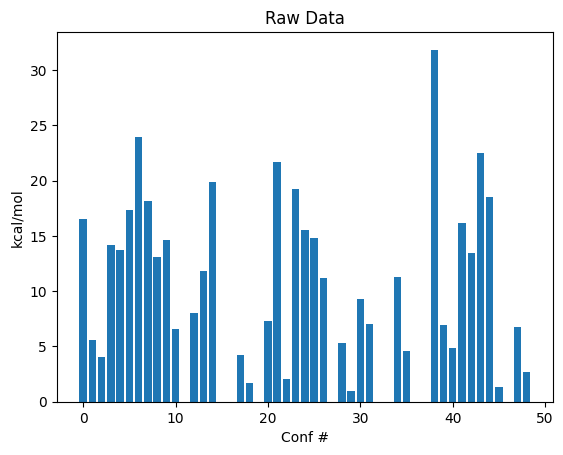

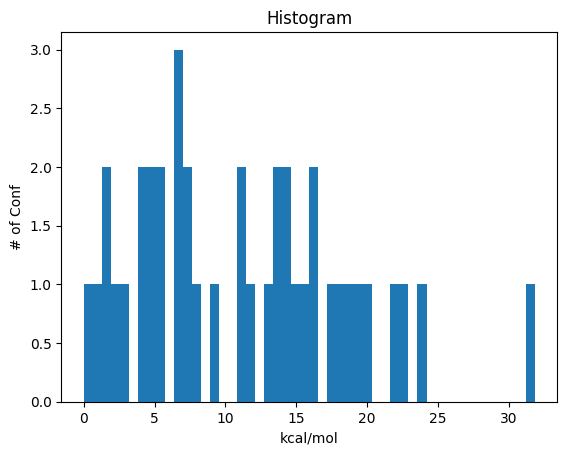

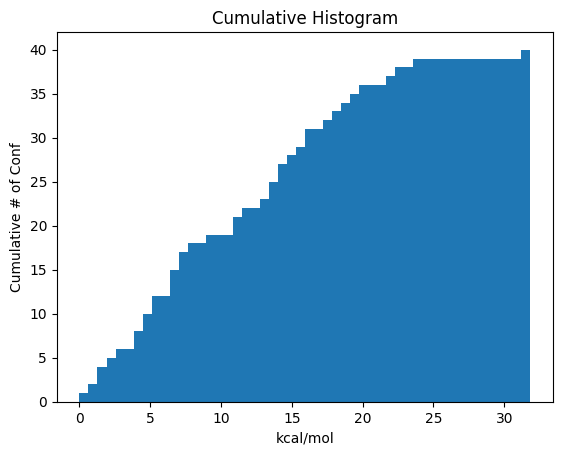

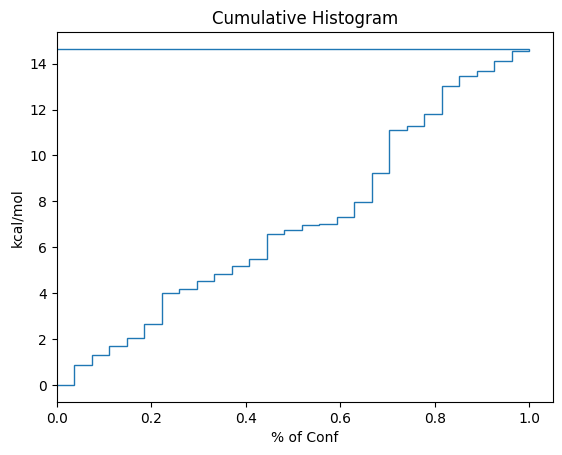

In [51]:
#@title Plot Energy data
from rdkit.sping.SVG.pidSVG import trunc
import matplotlib.pyplot as plt
import numpy as np

# Use numpy to generate a bunch of random data in a bell curve around 5.
#m,n = [m,n for m in conf_keep]

# Make a list of relative energies from MMFF minimized energies
rel_ener_list = [d - min_energy_MMFF for d in conf_ener]
# Truncate list to a max energy
ener_max = 15.0
array_ener = np.array(rel_ener_list)
max_list = np.where(array_ener < ener_max)
trunc_rel_e_list = rel_ener_list[:np.max(max_list)]

# Plot relaitve energies in different histograms
#m = [m for m in range(len(n))]
plt.bar(conf_keep, rel_ener_list)
plt.title("Raw Data")
plt.ylabel("kcal/mol")
plt.xlabel("Conf #")
plt.show()

plt.hist(rel_ener_list, bins=50)
plt.title("Histogram")
plt.ylabel("# of Conf")
plt.xlabel("kcal/mol")
plt.show()

plt.hist(rel_ener_list, cumulative=True, bins=50)
plt.title("Cumulative Histogram")
plt.ylabel("Cumulative # of Conf")
plt.xlabel("kcal/mol")
plt.show()

plt.hist(trunc_rel_e_list, density=True, cumulative=True, bins=200, histtype='step', orientation='horizontal')
plt.title("Cumulative Histogram")
plt.ylabel("kcal/mol")
plt.xlabel("% of Conf")
plt.show()

Use the Extract Dihedral Angles code to measure dihedral angles for each secondary or tertiary amide bond. Refer to the atom numbers in the image output by the Conformer generator above.

In [1]:
#@title Extract dihedral angles

from rdkit import Chem
from rdkit.Chem import rdMolTransforms
from rdkit.Chem import AllChem

# Define method to find dihedral angles
def mes_dihedral():
    # Prompt the user to define the atom indices for dihedral calculation
    print(f'For dihedral {n}')
    atom1 = int(input("Enter the atom index for Calpha: ")) - 1
    atom2 = int(input("Enter the atom index for C=O: ")) - 1
    atom3 = int(input("Enter the atom index for N: ")) - 1
    atom4 = int(input("Enter the atom index for Calpha2: ")) - 1
    print("index, dihedral",file=open(os.path.join(output_dir, f'{mol_name}_dihedral_{n}.csv'),'w+'))
    for index in conf_keep:
      dihedral = rdMolTransforms.GetDihedralDeg(m_3d.GetConformer(index), atom1,
      atom2, atom3, atom4)
      print(f'{index}, {dihedral}', file=open(os.path.join(output_dir, f'{mol_name}_dihedral_{n}.csv'),'a+'))

#Extract dihedral angles from the already created RDKit molecule
n = 1

count = int(input("How many dihedrals do you want: "))
while n <= count:
  mes_dihedral()
  n = n + 1



ModuleNotFoundError: No module named 'rdkit'